In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# %pip install import_ipynb
import import_ipynb

In [4]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
dataset = pd.read_excel(base_dir+'\_data\HOA_PD_SRM_Output_StatsTable__05-Jun-2024.xlsx')

input = dataset.iloc[:, 43:47]
output = dataset.iloc[:, 79:87]

input = input.to_numpy()
output = output.to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(input, output, test_size=0.3, train_size=0.7, random_state=0)

print("Shape of X =", Xtrain.shape, Xtest.shape)
print("Shape of y =", Ytrain.shape, Ytest.shape)

Shape of X = (142, 4) (62, 4)
Shape of y = (142, 8) (62, 8)


### Multi-Linear Regression Implementation with PCA and Stats

importing Jupyter notebook from pca.ipynb
X = 
 Training= 
 [[ 1.00055811e+00 -1.31691089e+00 -2.12754375e+00]
 [ 5.89337074e-01  3.08773965e+00  3.76470527e-01]
 [ 1.28687248e+00 -4.38801640e-01  2.38505555e-01]
 [ 6.95831981e-01 -6.75589830e-01  3.45543214e-01]
 [-2.09331012e-01 -1.54424802e-01  3.21340607e-01]
 [-2.25095505e-01 -3.77989404e-01  4.79443603e-01]
 [-2.60887682e-02 -2.09333929e-01  9.49398908e-01]
 [ 1.07490507e+00 -9.25528751e-01 -5.71215325e-01]
 [-7.72772381e-02 -5.75081502e-01 -1.08044943e+00]
 [ 2.44573529e+00  1.65073794e+00 -9.68897901e-01]
 [-1.09789507e+00  3.16593302e-01 -2.42501042e-01]
 [ 1.51041758e-01 -5.40638078e-01  7.86604593e-01]
 [-5.88517686e-01 -2.93574310e-01 -8.40743313e-01]
 [-1.07441032e+00 -1.24999534e-01 -9.16416389e-01]
 [-5.73323395e-01 -3.77727049e-01 -8.68569344e-01]
 [-7.66554250e-01 -2.37599818e-01  5.99619516e-01]
 [ 1.92766649e+00 -9.04029078e-01  3.85444575e-01]
 [-2.99302443e-01 -5.07069257e-01  6.29331119e-02]
 [-8.88117394e-01 -2.3

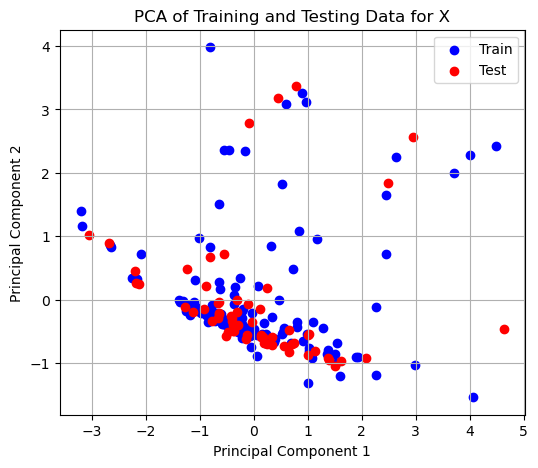

(142, 3) (62, 3)
(142, 1) (62, 1)
Y_pred_pca shape: (62, 1)


In [5]:
from pca import runPCA

## Run PCA on X
pc_x = runPCA(Xtrain, Xtest, False)
pc_X_train = pc_x[0]
pc_X_test = pc_x[1]
scalingX = pc_x[3]
print(pc_X_train.shape, pc_X_test.shape)

## Run PCA on Y
pc_y = runPCA(Ytrain, Ytest, True)
pc_Y_train = pc_y[0]
pc_Y_test = pc_y[1]
compY = pc_y[2]
scalingY = pc_y[3]
print(pc_Y_train.shape, pc_Y_test.shape)

mlr = LinearRegression()
mlr.fit(pc_X_train, pc_Y_train)

Y_pred_pca = mlr.predict(pc_X_test)

# print("Y_test shape:", Ytest.shape)
print("Y_pred_pca shape:", Y_pred_pca.shape)

### Generate Metrics

In [6]:
mse = mean_squared_error(pc_Y_test, Y_pred_pca)
print("MSE = ", mse)
r2 = r2_score(pc_Y_test, Y_pred_pca)
print("R2 Score = ", r2)

MSE =  1.1423511516279117
R2 Score =  0.07487626678080017


### Generate Plots

In [7]:
# plt.figure(figsize=(8, 6))
# plt.scatter(pc_Y_train, pc_Y_test, color='blue', label='Actual')
# plt.plot(pc_Y_test[:, 0], Y_pred_pca[:, 0], color='red', linestyle='--', label='Predicted 1st Component')
# plt.plot(pc_Y_test[:, 1], Y_pred_pca[:, 1], color='black', label='Predicted 2nd Component')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Linear Regression Predictions vs Actual Values in PCA Space')
# plt.legend()
# plt.grid(True)
# plt.show()

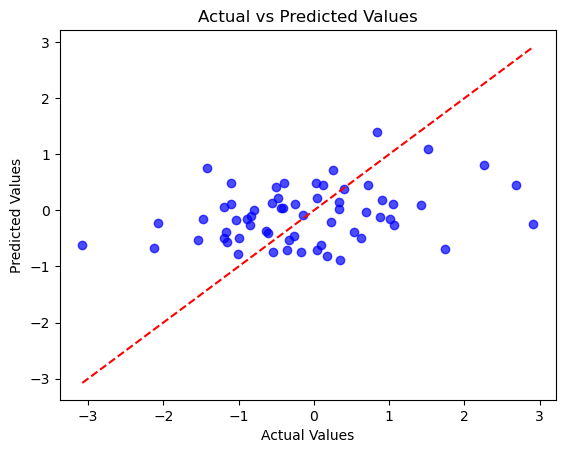

In [8]:
plt.scatter(pc_Y_test, Y_pred_pca, color='blue', alpha=0.7)
plt.plot([min(pc_Y_test), max(pc_Y_test)], [min(pc_Y_test), max(pc_Y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()